# preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data for the neural network
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [2]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3859 - accuracy: 0.8617 - val_loss: 0.3142 - val_accuracy: 0.8872
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2653 - accuracy: 0.9040 - val_loss: 0.2732 - val_accuracy: 0.8987
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2214 - accuracy: 0.9194 - val_loss: 0.2632 - val_accuracy: 0.9041
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1874 - accuracy: 0.9313 - val_loss: 0.2486 - val_accuracy: 0.9149
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1596 - accuracy: 0.9409 - val_loss: 0.2870 - val_accuracy: 0.9046
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1345 - accuracy: 0.9492 - val_loss: 0.2538 - val_accuracy: 0.9166
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1154 - accuracy: 0.9579 - val_loss: 0.2621 -

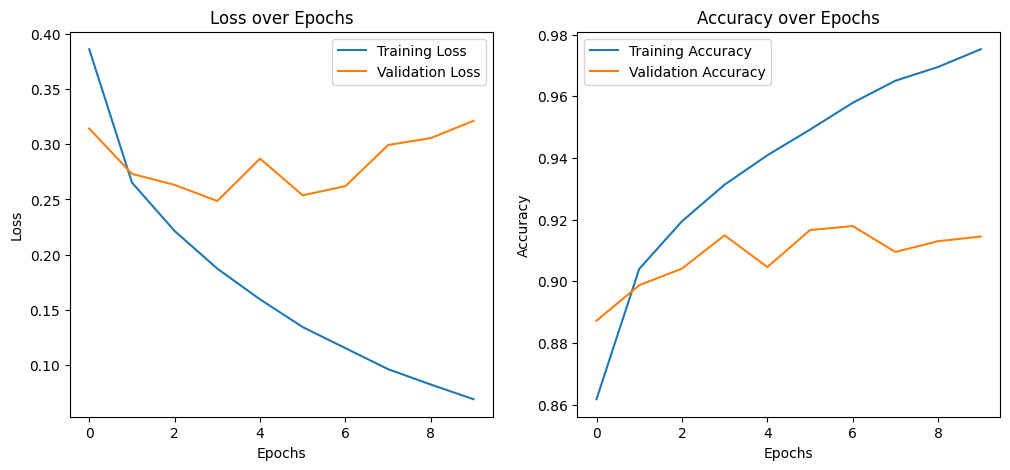

In [3]:
def plot_training_curves(history):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Evaluate the performance
plot_training_curves(history)


313/313 [==============================] - 1s 3ms/step


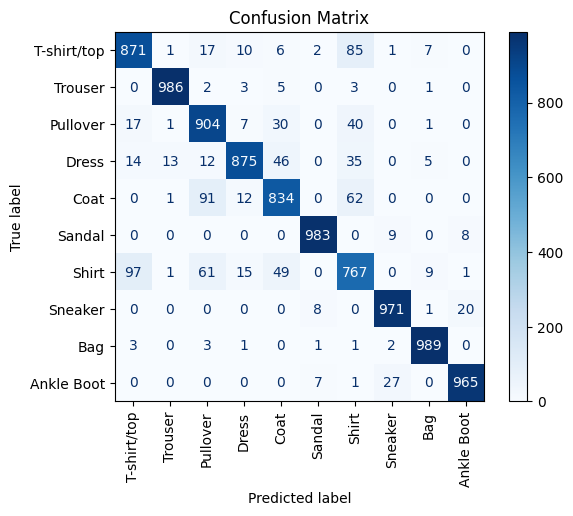

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the labels for the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_labels  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
